# Q4: BlackJack game, Fig. 5.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

FACE_CARDS={'ACE': 11, 'JACK': 10, 'QUEEN': 10, 'KING': 10}

for i in range(2, 11):
    FACE_CARDS[str(i)]=i

def draw_card():
    card=np.random.randint(1,  14)
    if(card==1):
        return 'ACE'
    elif(card==11):
        return 'JACK'
    elif(card==12):
        return 'QUEEN'
    elif(card==13):
        return 'KING'
    else:
        return str(card)

def play_blackjack():
    dealer_sum=0
    player_sum=0
    usable_ace=0
    
    state_action_array=[]
    
    player_cards=[]
    dealer_cards=[]
    
    player_card_1=draw_card()
    player_card_2=draw_card()

    player_card_1_value=FACE_CARDS[player_card_1]
    
    if(player_card_1=='ACE'):
        usable_ace=1
    
    player_sum+=player_card_1_value
    
    player_card_2_value=0
    if(player_card_2=='ACE' and player_sum<=10):
        player_card_2_value=11
        usable_ace=1
    elif(player_card_2=='ACE'):
        player_card_2_value=1
        usable_ace=1
    
    player_sum+=player_card_2_value
    
    dealer_card_1=draw_card()
    dealer_card_2=draw_card()
    
    dealer_card_1_value=FACE_CARDS[dealer_card_1]
    dealer_card_2_value=FACE_CARDS[dealer_card_2]
    
    
    dealer_show_card=dealer_card_1_value
    if(dealer_show_card==11):
        dealer_show_card=0
    
    state_action_array.append([player_sum, dealer_show_card, usable_ace])
        
    if(player_sum==21 and dealer_sum==21):
        return state_action_array, 0
    
    if(dealer_sum==21):
        return state_action_array, -1
    
    if(player_sum==21):
        return state_action_array, 1
    
    player_turn=True
    while(player_turn):
        
        card_drawn=draw_card()
        card_value=FACE_CARDS[card_drawn]
        player_sum+=card_value
        
        if(card_drawn=='ACE'):
            usable_ace=1
        
        if(player_sum>21):
            if(usable_ace==1):
                usable_ace=0
                player_sum-=10
            else:
                state_action_array.append([player_sum, dealer_show_card, usable_ace])
                return state_action_array, -1
        
        if(player_sum==20 or player_sum==21):
            state_action_array.append([player_sum, dealer_show_card, usable_ace])
            break
        
        state_action_array.append([player_sum, dealer_show_card, usable_ace])
    
    dealer_turn=True
    while(dealer_turn):
        
        card_drawn=draw_card()
        card_value=FACE_CARDS[card_drawn]
        dealer_sum+=card_value
        
        if(dealer_sum>21):
            return state_action_array, 1
        
        if(dealer_sum>=17):
            break
            
    if(player_sum==dealer_sum):
        return state_action_array, 0
    elif(player_sum>dealer_sum):
        return state_action_array, 1
    else:
        return state_action_array, -1
        
state_action_array, reward=play_blackjack()
print(state_action_array)
print(reward)

[[10, 4, 0], [15, 4, 0], [17, 4, 0], [20, 4, 0]]
-1


In [6]:
def compute_state_function():
    state_value_function=np.zeros((10, 10, 2))
    ten_thousand_function=np.zeros((10, 10, 2))
    normalizer=np.ones(state_value_function.shape)
    iters=500000
    
    for i in range(iters):
        state_action_array, reward=play_blackjack()
        
        for state_triplet in state_action_array:
            if(state_triplet[0]<=21):
                state_value_function[state_triplet[0]-12][state_triplet[1]-1][state_triplet[2]]+=reward
                normalizer[state_triplet[0]-12][state_triplet[1]-1][state_triplet[2]]+=1
        
        if(i==10001):
            from copy import deepcopy
            ten_thousand_function=state_value_function.copy()
        
    return ten_thousand_function, state_value_function, normalizer
    
ten_thousand_function, state_value_function, normalizer=compute_state_function()
print((state_value_function/normalizer).reshape((100, 2)))

[[ 0.          0.        ]
 [-0.50378685 -0.32      ]
 [-0.4869421  -0.32743363]
 [-0.52700313 -0.30125523]
 [-0.51032205 -0.24380165]
 [-0.50848637 -0.31415929]
 [-0.50829255 -0.27983539]
 [-0.50786798 -0.27868852]
 [-0.52889499 -0.3269962 ]
 [-0.50888067 -0.29354553]
 [ 0.          0.        ]
 [-0.54107383 -0.30218069]
 [-0.54085233 -0.34762634]
 [-0.53547764 -0.3024602 ]
 [-0.55142897 -0.37271215]
 [-0.53948935 -0.34264706]
 [-0.54524519 -0.3276131 ]
 [-0.52347222 -0.3215859 ]
 [-0.51995131 -0.32876712]
 [-0.54547452 -0.34703748]
 [ 0.          0.        ]
 [-0.57388637 -0.35367545]
 [-0.56794823 -0.32258065]
 [-0.56884488 -0.3196347 ]
 [-0.55800675 -0.26190476]
 [-0.54447334 -0.3681073 ]
 [-0.57861072 -0.29361702]
 [-0.55657571 -0.25981873]
 [-0.56013968 -0.27286585]
 [-0.55864935 -0.32919988]
 [ 0.          0.        ]
 [-0.58701364 -0.42456609]
 [-0.59731122 -0.39233818]
 [-0.57646318 -0.34631433]
 [-0.59286425 -0.4077135 ]
 [-0.58525059 -0.36193029]
 [-0.59152953 -0.3972028 ]
 

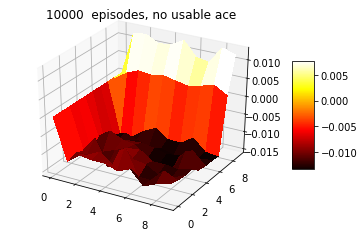

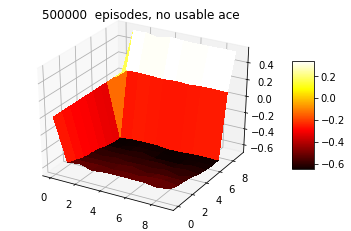

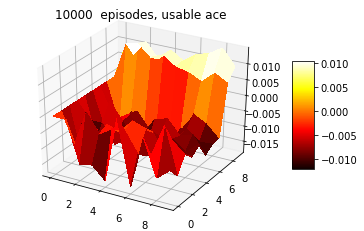

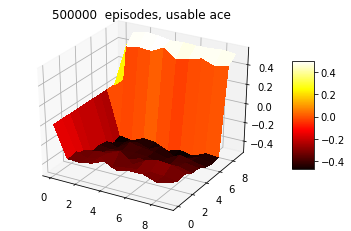

In [7]:
#Reference from: https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights
from mpl_toolkits.mplot3d import Axes3D

# state_value_function=np.transpose(state_value_function, (1, 0, 2))
# ten_thousand_function=np.transpose(ten_thousand_function, (1, 0, 2))

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(ten_thousand_function/normalizer)[:, :, 0],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('10000  episodes, no usable ace')
plt.show()

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(state_value_function/normalizer)[:, :, 0],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('500000  episodes, no usable ace')
plt.show()

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(ten_thousand_function/normalizer)[:, :, 1],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('10000  episodes, usable ace')
plt.show()

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(state_value_function/normalizer)[:, :, 1],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('500000  episodes, usable ace')
plt.show()


# Q4: BlackJack game, Fig. 5.2

In [383]:
ACTIONS={'STICK':0, 'HIT':1}

def play_blackjack(policy):
    dealer_sum=0
    player_sum=0
    usable_ace=0
    
    state_action_array=[]
    
    player_sum=np.random.randint(12, 21)
    dealer_show_card=np.random.randint(1, 9)
    usable_ace=np.random.randint(0, 2)
    
    dealer_sum+=dealer_show_card+FACE_CARDS[draw_card()]
            
    if(np.random.choice([0, 1])==ACTIONS['STICK']):
        action_taken=ACTIONS['STICK']
    else:
        action_taken=ACTIONS['HIT']
    
    player_turn=True
    
    if(action_taken==ACTIONS['STICK']):
        player_turn=False
        state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
    else:
        player_turn=True
        card_drawn=draw_card()
        card_value=FACE_CARDS[card_drawn]
        player_sum+=card_value
        
        if(card_drawn=='ACE'):
            usable_ace=1
        
        if(player_sum>21):
            if(usable_ace==1):
                usable_ace=0
                player_sum-=10
            else:
                state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
                return state_action_array, -1
        
        state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])

    
    if(player_sum==21 and dealer_sum==21):
        return state_action_array, 0
    
    if(dealer_sum==21):
        return state_action_array, -1
    
    if(player_sum==21):
        return state_action_array, 1
    
    if(player_sum>21):
        return state_action_array, -1
    
    while(player_turn):
        
#         print(player_sum, dealer_show_card, usable_ace)
        if(player_sum>21):
            return state_action_array, -1
        action_taken=policy[player_sum-12][dealer_show_card-1][usable_ace]
        
        if(action_taken==ACTIONS['STICK']):
            state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
            break
        else:
            card_drawn=draw_card()
            card_value=FACE_CARDS[card_drawn]
            player_sum+=card_value
        
            if(card_drawn=='ACE'):
                usable_ace=1
        
            if(player_sum>21):
                if(usable_ace==1):
                    usable_ace=0
                    player_sum-=10
                else:
                    state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
                    return state_action_array, -1
        
            state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
    
    dealer_turn=True
    while(dealer_turn):
        
        card_drawn=draw_card()
        card_value=FACE_CARDS[card_drawn]
        dealer_sum+=card_value
        
        if(dealer_sum>21):
            return state_action_array, 1
        
        if(dealer_sum>=17):
            break
            
    if(player_sum==dealer_sum):
        return state_action_array, 0
    elif(player_sum>dealer_sum):
        return state_action_array, 1
    else:
        return state_action_array, -1
        

policy=np.ones((10, 10, 2))

for i in range(10):
    policy[8][i][0]=ACTIONS['STICK']
    policy[9][i][0]=ACTIONS['STICK']
    policy[8][i][1]=ACTIONS['STICK']
    policy[9][i][1]=ACTIONS['STICK']

state_action_array, reward=play_blackjack(policy)
print(state_action_array)
print(reward)

[[16, 8, 0, 0]]
-1


In [384]:
def compute_action_function():
    action_value_function=np.zeros((10, 10, 2, 2))
    ten_thousand_function=np.zeros((10, 10, 2, 2))
    normalizer=np.ones(action_value_function.shape)
    normalizer_states=np.ones((10, 10, 2))
    iters=500000
    
    policy=np.ones((10, 10, 2))

    for i in range(10):
        policy[8][i][0]=ACTIONS['STICK']
        policy[9][i][0]=ACTIONS['STICK']
        policy[8][i][1]=ACTIONS['STICK']
        policy[9][i][1]=ACTIONS['STICK']

    
    for i in range(iters):
        action_array, reward=play_blackjack(policy)
        
        for state_quat in action_array:
            if(state_quat[0]<=21):
                state_quat[3]=int(state_quat[3])
                action_value_function[state_quat[0]-12][state_quat[1]-1][state_quat[2]][state_quat[3]]+=(reward-action_value_function[state_quat[0]-12][state_quat[1]-1][state_quat[2]][state_quat[3]])/iters
                normalizer[state_quat[0]-12][state_quat[1]-1][state_quat[2]][state_quat[3]]+=1
                normalizer_states[state_quat[0]-12][state_quat[1]-1][state_quat[2]]+=1
                
                action_value_function=action_value_function
            
                if(i==10001):
                    from copy import deepcopy
                    ten_thousand_function=action_value_function.copy()
                
                if(action_value_function[state_quat[0]-12][state_quat[1]-1][state_quat[2]][ACTIONS['HIT']]>action_value_function[state_quat[0]-12][state_quat[1]-1][state_quat[2]][ACTIONS['STICK']]):
                    policy[state_quat[0]-12][state_quat[1]-1][state_quat[2]]=ACTIONS['HIT']
                else:
                    policy[state_quat[0]-12][state_quat[1]-1][state_quat[2]]=ACTIONS['STICK']
                    
    return ten_thousand_function, action_value_function, policy, normalizer, normalizer_states
    
ten_thousand_function, action_value_function, policy, normalizer, normalizer_states=compute_action_function()
# print(action_value_function.reshape((100, 4)))
print(policy[:, :, 0].reshape((10, 10)))
print(policy[:, :, 1].reshape((10, 10)))

[[1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]]


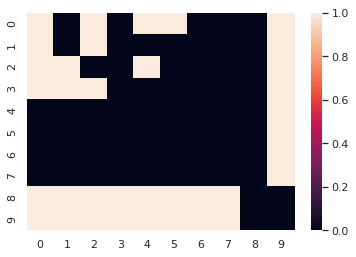

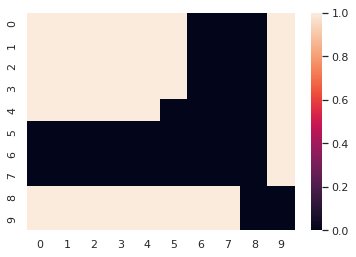

In [385]:
import seaborn as sns
sns.set()

sns.heatmap(np.transpose(policy[:, :, 0], (1, 0)).reshape((10, 10)))
plt.show()
sns.heatmap(np.transpose(policy[:, :, 1], (1, 0)).reshape((10, 10)))
plt.show()

[[[[-1.33680369e-03 -1.33372329e-03]
   [-1.04822892e-03  0.00000000e+00]]

  [[-8.87665956e-04 -8.82587625e-04]
   [-7.08716455e-04  0.00000000e+00]]

  [[-6.62144010e-04 -6.58858723e-04]
   [-5.16985005e-04  0.00000000e+00]]

  [[-7.60151091e-04 -7.44837165e-04]
   [-2.57438801e-04  0.00000000e+00]]

  [[-2.43104332e-04 -2.57475686e-04]
   [-1.65728552e-04  0.00000000e+00]]

  [[ 3.02943674e-04  1.51790848e-04]
   [ 1.75695889e-04  0.00000000e+00]]

  [[ 1.25591116e-03  7.18915547e-04]
   [ 7.24651279e-04  0.00000000e+00]]

  [[ 2.29623425e-03  1.09225750e-03]
   [ 1.02430207e-03  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]]


 [[[-1.76514683e-03 -1.76647723e-03]
   [-1.04618496e-03  0.00000000e+00]]

  [[-9.92763043e-04 -9.94022914e-04]
   [-4.41248250e-04  0.00000000e+00]]

  [[-8.75588955e-04 -8.70405425e-04]
   [-5.27017700e-04  0.00000000e+00]]

  [[-4.923

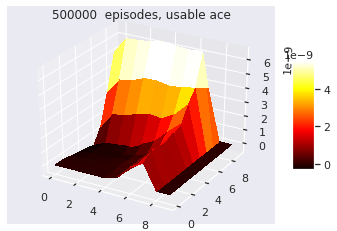

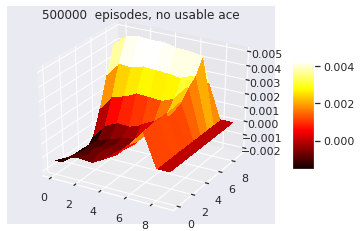

In [386]:
state_value_function=np.zeros((10, 10, 2))

print(action_value_function)

for i in range(state_value_function.shape[0]):
    for j in range(state_value_function.shape[1]):
        for k in range(state_value_function.shape[2]):
            state_value_function[i][j][k]=max(action_value_function[i][j][k][0], action_value_function[i][j][k][1])
print(state_value_function)    

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(state_value_function/np.sum(normalizer))[:, :, 1],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('500000  episodes, usable ace')
plt.show()

X=np.arange(0,10)
Y=np.arange(0,10)
X,Y=np.meshgrid(X,Y)
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,(state_value_function)[:, :, 0],rstride=1,cstride=1,cmap='hot',linewidth=0,antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('500000  episodes, no usable ace')
plt.show()

# Q4: BlackJack game, Fig. 5.3

In [49]:
def play_blackjack_off_policy():
    dealer_sum=0
    player_sum=0
    usable_ace=0
    
    state_action_array=[]
    
    player_sum=13
    dealer_show_card=2
    usable_ace=1
    
    dealer_sum+=dealer_show_card+FACE_CARDS[draw_card()]
    
    if(np.random.choice([0, 1])==ACTIONS['STICK']):
        state_action_array.append([player_sum, dealer_show_card, usable_ace, ACTIONS['STICK']])
    else:
        state_action_array.append([player_sum, dealer_show_card, usable_ace, ACTIONS['HIT']])
        
    if(player_sum==21 and dealer_sum==21):
        return state_action_array, 0
    
    if(dealer_sum==21):
        return state_action_array, -1
    
    if(player_sum==21):
        return state_action_array, 1
    
    player_turn=True
    while(player_turn):
        if(np.random.choice([0, 1])==ACTIONS['STICK']):
            action_taken=ACTIONS['STICK']
        else:
            action_taken=ACTIONS['HIT']
            
        if(action_taken==ACTIONS['STICK']):
            state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
            break
        else:
            card_drawn=draw_card()
            card_value=FACE_CARDS[card_drawn]
            player_sum+=card_value
        
            if(card_drawn=='ACE'):
                usable_ace=1
        
            if(player_sum>21):
                if(usable_ace==1):
                    usable_ace=0
                    player_sum-=10
                else:
                    state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
                    return state_action_array, -1
        
            state_action_array.append([player_sum, dealer_show_card, usable_ace, action_taken])
    
    dealer_turn=True
    while(dealer_turn):
        
        card_drawn=draw_card()
        card_value=FACE_CARDS[card_drawn]
        dealer_sum+=card_value
        
        if(dealer_sum>21):
            return state_action_array, 1
        
        if(dealer_sum>=17):
            break
            
    if(player_sum==dealer_sum):
        return state_action_array, 0
    elif(player_sum>dealer_sum):
        return state_action_array, 1
    else:
        return state_action_array, -1
        
state_action_array, reward=play_blackjack_off_policy()
print(state_action_array)
print(reward)    
    
        

[[13, 2, 1, 0], [13, 2, 0, 1], [13, 2, 0, 0]]
1


In [58]:
target_policy={}

for ter in [12, 13, 14, 15, 16, 17, 18, 19]:
    target_policy[ter]=ACTIONS['HIT']

target_policy[20]=ACTIONS['STICK']
target_policy[21]=ACTIONS['STICK']

prob=2

def compute_state_value_off_policy():
    rho_values=np.zeros(10000)
    rewards=np.zeros(10000)
    
    state_value_function=np.zeros((10, 10, 2))
    normalizer=np.ones(state_value_function.shape)
    iters=10000
    
    for i in range(iters):
        state_action_array, reward=play_blackjack_off_policy()

        rho_val=1
        for state_triplet in state_action_array[::-1]:
            if(state_triplet[0]<=21):
                if(state_triplet[3]==target_policy[state_triplet[0]]):
                    rho_val*=prob
                else:
                    rho_val*=0
                    break
                    
            rho_values[i]=rho_val
            rewards[i]=reward
            
    num_vals=rho_values*rewards
    denom_vals=rho_values
    
    return np.add.accumulate(num_vals), np.add.accumulate(denom_vals)
    
numerator_vals, denom_vals=compute_state_value_off_policy()

[    0.     0.     0. ... -4096. -4096. -4104.]


In [60]:
ordinary_sampling_errs=np.zeros((100, 10000))
weighted_sampling_errs=np.zeros((100, 10000))

for run in range(100):
    print('Run:', run)
    numerator_vals, denom_vals=compute_state_value_off_policy()
    j_value=np.asarray([it for it in range(1, 10001)])
    
    ordinary_sampling_errs[run]=np.power((numerator_vals/j_value)-(-0.27726), 2)
    weighted_sample=np.zeros(10000)
    for sample in range(len(numerator_vals)):
        if(denom_vals[sample]==0):
            continue
        weighted_sample[sample]=numerator_vals[sample]/denom_vals[sample]
        
    weighted_sampling_errs[run]=np.power(weighted_sample-(-0.27726), 2)
    
print(weighted_sampling_errs)
print(ordinary_sampling_errs)

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
[[0.07687311 0.07687311 0.07687311 ... 0.09955259 0.09955259 0.09955259]
 [0.07687311 0.07687311 0.07687311 ... 0.09182486 0.09182486 0.09182486]
 [0.52235311 0.00314422 0.10416111 ... 0.09342663 0.09358556 0.0

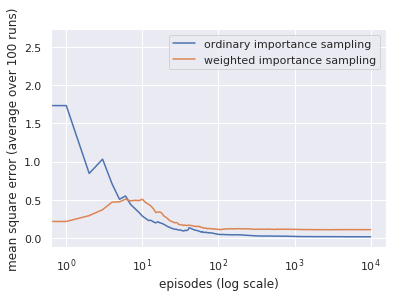

In [63]:
plot_ord=np.mean(ordinary_sampling_errs, axis=0)
plot_weight=np.mean(weighted_sampling_errs, axis=0)

plt.plot(plot_ord, label='ordinary importance sampling')
plt.plot(plot_weight, label='weighted importance sampling')
plt.xscale('log')
plt.xlabel('episodes (log scale)')
plt.ylabel('mean square error (average over 100 runs)')
plt.legend(loc='best')
plt.show()

# Q6: Random Walk, Eg. 6.2

In [126]:
ACTIONS={'left': 0, 'right': 1}
TRUE_VALUES=[0, 1/6, 2/6, 1/2, 4/6, 5/6, 0]

def get_next_state_reward_given_action_state(action, state):
    if(action==ACTIONS['left']):
        state-=1
    else:
        state+=1
    if(state==6):
        return state, 1
    return state, 0

def monte_carlo(alpha):
    state_value_function=np.zeros(7)
    state_value_function.fill(0.5)
    state_value_function[0]=0
    state_value_function[6]=0
    
    mean_sq_errors=np.zeros(100)
    
    for episode in range(100):
        curr_state=len(state_value_function)//2
        state_action_array=[]
        
        episode_cont=True
        while(episode_cont):
            if(np.random.choice([0, 1])==ACTIONS['left']):
                action_taken=ACTIONS['left']
            else:
                action_taken=ACTIONS['right']
                
            next_state, reward=get_next_state_reward_given_action_state(action_taken, curr_state)
            state_action_array.append([curr_state, action_taken, reward])
            curr_state=next_state
            if(curr_state==6 or curr_state==0):
                break
                
        return_ep=0
        for state_triplet in state_action_array[::-1]:
            return_ep+=state_triplet[2]
            state_value_function[state_triplet[0]]+=alpha*(return_ep-state_value_function[state_triplet[0]])
        mean_sq_errors[episode]=np.sqrt(np.mean(np.power(state_value_function-TRUE_VALUES, 2))) 
    return mean_sq_errors
            

In [127]:
def td_0(alpha, plot=True):
    state_value_function=np.zeros(7)
    state_value_function.fill(0.5)
    state_value_function[0]=0
    state_value_function[6]=0
    
    mean_sq_errors=np.zeros(100)
    
    for episode in range(100):
        
        if(alpha==0.1 and episode==0 and plot):
            plt.plot(['A', 'B', 'C', 'D', 'E'], state_value_function[1:-1], label=episode)
        
        curr_state=len(state_value_function)//2
        
        episode_cont=True
        while(episode_cont):
            if(np.random.choice([0, 1])==ACTIONS['left']):
                action_taken=ACTIONS['left']
            else:
                action_taken=ACTIONS['right']
                
            next_state, reward=get_next_state_reward_given_action_state(action_taken, curr_state)
            state_value_function[curr_state]+=alpha*(state_value_function[next_state]+reward-state_value_function[curr_state])
            curr_state=next_state
            if(curr_state==6 or curr_state==0):
                break
                
        if(episode in [1,10, 99] and plot):
            plt.plot(['A', 'B', 'C', 'D', 'E'], state_value_function[1:-1], label=episode)
        mean_sq_errors[episode]=np.sqrt(np.mean(np.power(state_value_function-TRUE_VALUES, 2)))
    
    if(alpha==0.1 and plot):
        plt.plot(['A', 'B', 'C', 'D', 'E'], TRUE_VALUES[1:-1], label='True')
        plt.legend(loc='best')
        plt.show()
    
#     plt.plot(list(mean_sq_errors))
#     plt.show()
    return mean_sq_errors

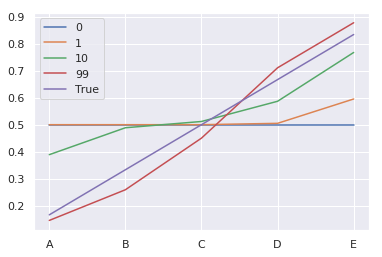

array([0.1933672 , 0.18793587, 0.18288419, 0.17821195, 0.17413553,
       0.16769942, 0.16220311, 0.15781658, 0.15175851, 0.14841597,
       0.14309638, 0.13811272, 0.1348366 , 0.13176562, 0.12663391,
       0.12271773, 0.11878782, 0.1148663 , 0.11130276, 0.10599111,
       0.10101776, 0.09719152, 0.09419815, 0.09121517, 0.08867056,
       0.08843273, 0.08571926, 0.08295533, 0.07973694, 0.08112259,
       0.0772313 , 0.07324058, 0.06903712, 0.06899479, 0.06891166,
       0.06638978, 0.06312252, 0.06274763, 0.06700815, 0.06193406,
       0.05715258, 0.05424868, 0.0510087 , 0.0463417 , 0.04245632,
       0.03898986, 0.03835774, 0.03734125, 0.03689086, 0.03361267,
       0.03826018, 0.0371344 , 0.04387708, 0.0461174 , 0.04781793,
       0.04501408, 0.04398845, 0.04543185, 0.04574271, 0.04065466,
       0.03979775, 0.03937722, 0.03501802, 0.03704602, 0.03867306,
       0.0345362 , 0.03494958, 0.03440934, 0.03593369, 0.04361687,
       0.03999294, 0.04040561, 0.04304276, 0.0452564 , 0.04714

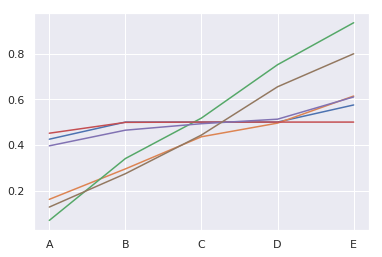

In [128]:
td_0(0.1, plot=True)
td_0(0.15, plot=True)
td_0(0.05, plot=True)

Alpha: 0.1
Alpha: 0.15
Alpha: 0.05
Alpha: 0.01
Alpha: 0.02
Alpha: 0.03
Alpha: 0.04


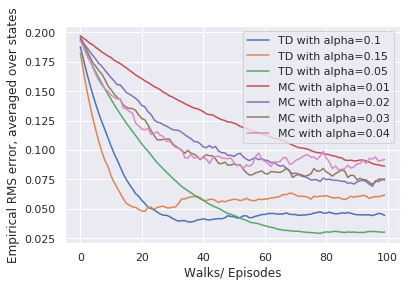

In [129]:
alphas_td=[0.1, 0.15, 0.05]

for alpha in alphas_td:
    print('Alpha:', alpha)
    rmse_td=np.zeros((100, 100))
    for run in range(100):
        rmse_td[run]=td_0(alpha, plot=False)

    plt.plot(np.mean(rmse_td, axis=0), label='TD with alpha='+str(alpha))

alphas_mc=[0.01, 0.02, 0.03, 0.04]

for alpha in alphas_mc:
    print('Alpha:', alpha)
    rmse_mc=np.zeros((100, 100))
    for run in range(100):
        rmse_mc[run]=monte_carlo(alpha)

    plt.plot(np.mean(rmse_mc, axis=0), label='MC with alpha='+str(alpha))

plt.xlabel('Walks/ Episodes')
plt.ylabel('Empirical RMS error, averaged over states')
plt.legend(loc='best')
plt.show()

# Q7. Cliff walking, Eg. 6.6

In [132]:
num_rows=4
num_cols=12
num_actions=4
goal_state=(3, num_cols-1)

ep=0.1
ACTIONS=[[0, 1], [0, -1], [1, 0], [-1, 0]] 
alpha=0.5

In [136]:

def get_next_state_reward_given_action_state_cliff(state, action):
    action=ACTIONS[action]
    state_x=state%num_cols
    state_y=state//num_cols
    
    next_state_x=state_x+action[0]
    next_state_y=state_y+action[1]
    
    if(next_state_x<0 or next_state_y<0 or next_state_x>=num_cols or next_state_y>=num_rows):
        return (state, -1)
    
    if(next_state_y==3 and next_state_x>=1 and next_state_x<=num_cols-2):
        return (36, -100)
    
    next_state=next_state_y*num_cols+next_state_x
    return (next_state, -1)

def sarsa():
    action_value_function=np.zeros((num_rows*num_cols, num_actions))
    rewards=np.zeros(500)
    for episode in range(500):
        curr_state=36
        action_taken=0
        
        if(np.random.uniform()<=ep):
            action_taken=np.random.randint(0, 4)
        else:
            action_taken=np.argmax(action_value_function[curr_state])
        
        sarsa_loop=True
        while(sarsa_loop):
            next_state, reward=get_next_state_reward_given_action_state_cliff(curr_state, action_taken)
            rewards[episode]+=reward
            
            next_action=0
            if(np.random.uniform()<=ep):
                next_action=np.random.randint(0, 4)
            else:
                next_action=np.argmax(action_value_function[next_state])
            
            action_value_function[curr_state][action_taken]+=alpha*(reward+action_value_function[next_state][next_action]-action_value_function[curr_state][action_taken])

            curr_state=next_state
            action_taken=next_action
        
            if(next_state==47):
                break
        if(rewards[episode]<-100):
            rewards[episode]=-100
    return rewards

In [137]:
def q_learning():
    action_value_function=np.zeros((num_rows*num_cols, num_actions))
    rewards=np.zeros(500)
    
    for episode in range(500):
        curr_state=36
        
        q_loop=True
        while(q_loop):
            action_taken=0
            
            if(np.random.uniform()<=ep):
                action_taken=np.random.randint(0, 4)
            else:
                action_taken=np.argmax(action_value_function[curr_state])
                
            next_state, reward=get_next_state_reward_given_action_state_cliff(curr_state, action_taken)
            rewards[episode]+=reward
            
            action_value_function[curr_state][action_taken]+=alpha*(reward+np.max(action_value_function[next_state])-action_value_function[curr_state][action_taken])
            curr_state=next_state
            
            if(next_state==47):
                break
        if(rewards[episode]<-100):
            rewards[episode]=-100
    return rewards

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run

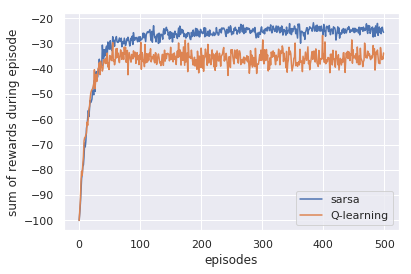

In [140]:
rewards_sarsa=np.zeros((200, 500))
rewards_q=np.zeros((200, 500))

for run in range(200):
    print('Run:', run)
    rewards_sarsa[run]=sarsa()
    rewards_q[run]=q_learning()

plt.plot(np.mean(rewards_sarsa, axis=0), label='sarsa')
plt.plot(np.mean(rewards_q, axis=0), label='Q-learning')
plt.xlabel('episodes')
plt.ylabel('sum of rewards during episode')
plt.legend()
plt.show()